Import Libraries

In [170]:
import numpy as np
import pandas as pd

Import Data

In [171]:
data=pd.read_excel('p1-customers.xlsx')
data

Name    Customer_Segment  Customer_ID  \
0          Pamela Wright  Store Mailing List            2   
1          Danell Valdez  Store Mailing List            7   
2       Jessica Rinehart  Store Mailing List            8   
3            Nancy Clark  Store Mailing List            9   
4            Andrea Brun  Store Mailing List           10   
5         Denise Pentico  Store Mailing List           11   
6        Erna Arustamyan  Store Mailing List           12   
7          Karen Osborne  Store Mailing List           16   
8       Shirley Krywonis  Store Mailing List           17   
9       Dianne Vangilder  Store Mailing List           19   
10           Mary Kiniry  Store Mailing List           26   
11     Belinda Deherrera  Store Mailing List           28   
12            Keli Scott  Store Mailing List           31   
13          Cynthia Wyat  Store Mailing List           36   
14          Ann Balliett  Store Mailing List           40   
15                J Ritz  Store Mailing List           55   
16      Jeralyn Braddock  Store Mailing List           57   
17            Amy Halter  Store Mailing List           60   
18        Heather Conway  Store Mailing List           65   
19    Christine Triantos  Store Mailing List           70   
20           Katie Bills  Store Mailing List           72   
21             Judy Lamb  Store Mailing List           73   
22        Megan Mcmillin  Store Mailing List           74   
23           Lanh Nguyen  Store Mailing List           75   
24        Larie Marriott  Store Mailing List           76   
25           Joan Shafer  Store Mailing List           77   
26     Alexandra Murcray  Store Mailing List           78   
27        Erin Fugleberg  Store Mailing List           88   
28          Raunce Scott  Store Mailing List           90   
29        Alberta Graves  Store Mailing List           98   
...                  ...                 ...          ...   
2345         Linda Pakso    Credit Card Only         3145   
2346       Sharon Mouton    Credit Card Only         3146   
2347         Mary Hollis    Credit Card Only         3148   
2348        Karen Schleu    Credit Card Only         3151   
2349    Ethelmae Robbins    Credit Card Only         3154   
2350        Doris Purvis    Credit Card Only         3155   
2351     Chris Chevarria    Credit Card Only         3159   
2352       Dianne Fisher    Credit Card Only         3167   
2353  Claudia Villanueva    Credit Card Only         3168   
2354         Cheri Hauck    Credit Card Only         3172   
2355         Lynea Askey    Credit Card Only         3179   
2356       Angelina Dale    Credit Card Only         3186   
2357          Lynn Roden    Credit Card Only         3192   
2358    Suzanne Grierson    Credit Card Only         3196   
2359       Janine Jallow    Credit Card Only         3197   
2360     Brandy Orvidahl    Credit Card Only         3218   
2361        Carol Dallas    Credit Card Only         3224   
2362       Iris Martinez    Credit Card Only         3228   
2363       Harouna Banse    Credit Card Only         3236   
2364     Jennifer Barger    Credit Card Only         3239   
2365        Penny Culpan    Credit Card Only         3257   
2366        Candie Ahmed    Credit Card Only         3258   
2367     Adriana Alcalde    Credit Card Only         3272   
2368     Michelle Stover    Credit Card Only         3284   
2369    Cathleen Johnson    Credit Card Only         3285   
2370         Joan Delisa    Credit Card Only         3287   
2371      Helen Cordiner    Credit Card Only         3299   
2372       Angela Finley    Credit Card Only         3303   
2373  Christine Sullivan    Credit Card Only         3304   
2374     Elissa Engledow    Credit Card Only         3315   

                   Address               City State    ZIP  Avg_Sale_Amount  \
0         376 S Jasmine St             Denver    CO  80224           227.90   
1         12066 E Lake Cir  Greenwood Village    CO  80111            55.00   


In [172]:
#y_data=data['Avg_Sale_Amount'].to_frame('Avg_Num_Products_Purchased') 
print (data.shape)
y_data=data['Avg_Sale_Amount']
x_data=data.drop('Avg_Sale_Amount',axis=1)

#drop unecessary columns
print(x_data['Name'].nunique())
print(x_data['State'].nunique())
print(x_data['ZIP'].nunique())

x_data=x_data.drop(['Address','Name','State'],axis=1)

(2375, 12)
2366
1
86


Data Exploration

In [173]:
y_data.head()

0    227.90
1     55.00
2    212.57
3    195.31
4    110.55
Name: Avg_Sale_Amount, dtype: float64

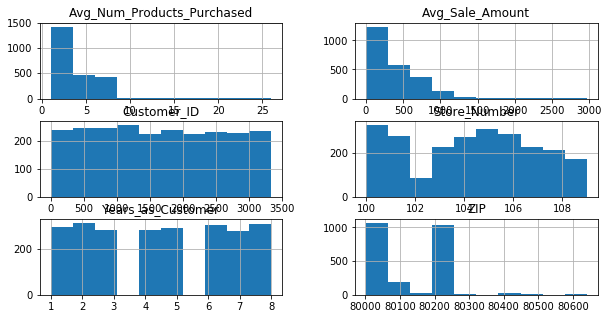

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
data.hist(figsize=(10,5));

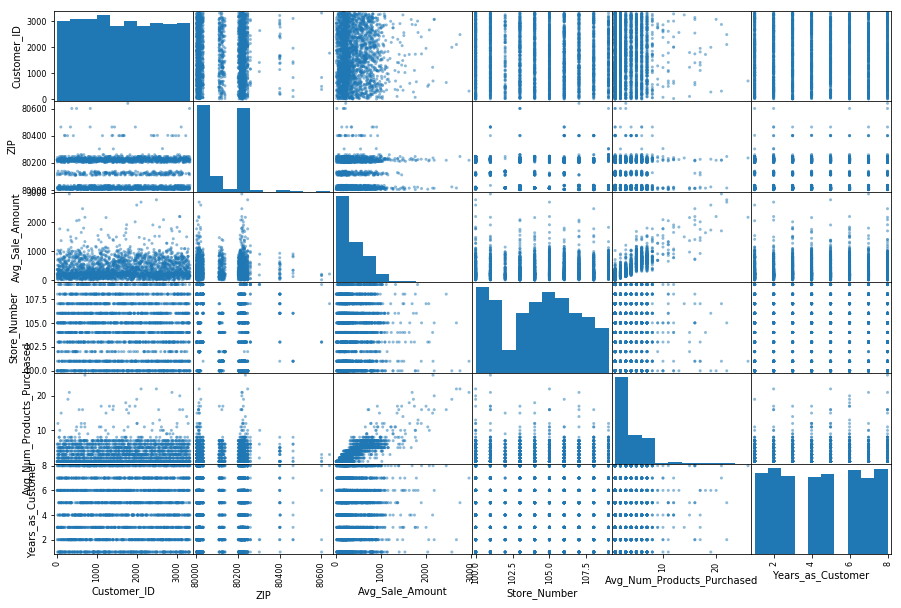

In [175]:
pd.plotting.scatter_matrix(data,figsize=(15,10));

In [176]:

#drop values with high p-values
x_data=x_data.drop(['City','Responded_to_Last_Catalog','Customer_ID','Store_Number','ZIP','Years_as_Customer'],axis=1)

columnsToEncode=['Customer_Segment']
x_data= pd.get_dummies(x_data, columns=columnsToEncode)
x_data.head(3)


Avg_Num_Products_Purchased  Customer_Segment_Credit Card Only  \
0                           1                                  0   
1                           1                                  0   
2                           1                                  0   

   Customer_Segment_Loyalty Club Only  \
0                                   0   
1                                   0   
2                                   0   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              0   
2                                              0   

   Customer_Segment_Store Mailing List  
0                                    1  
1                                    1  
2                                    1

Performance Metric

In [177]:
from sklearn.metrics import r2_score

def performance_metric(y_true,y_predict):
    return r2_score(y_true,y_predict)

Developing a model

In [137]:
#WITH CITY AND RESPONDED TO CATALOG
import statsmodels.api as sm

X2 = sm.add_constant(x_data)
est = sm.OLS(y_data, x_data)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     349.8
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:31:39   Log-Likelihood:                -15041.
No. Observations:                2375   AIC:                         3.015e+04
Df Residuals:                    2339   BIC:                         3.036e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [178]:
# Removed unecessary fields
import statsmodels.api as sm

X2 = sm.add_constant(x_data)
est = sm.OLS(y_data, x_data)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Mon, 12 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:14:24   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Training Model

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1900, 5)
(1900,)
(475, 5)
(475,)


In [180]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing Model

In [181]:
pred=regr.predict(X_test)
performance_metric(y_test,pred)

0.8318438033205382

Predict Catalog Demand

In [217]:
pred_data=pd.read_excel('p1-mailinglist.xlsx')
pred_data

Name              Customer_Segment  Customer_ID  \
0               A Giametti             Loyalty Club Only         2213   
1             Abby Pierson  Loyalty Club and Credit Card         2785   
2            Adele Hallman             Loyalty Club Only         2931   
3          Alejandra Baird             Loyalty Club Only         2231   
4             Alice Dewitt             Loyalty Club Only         2530   
5           Amanda Donahoe              Credit Card Only         1946   
6            Amanda Huerta  Loyalty Club and Credit Card         1212   
7             Angie Reffel              Credit Card Only          369   
8                 Anh Tran              Credit Card Only         1683   
9            Anna Crumrine             Loyalty Club Only         1940   
10           April Johnson            Store Mailing List          174   
11             Aul Pedajas             Loyalty Club Only          256   
12                B Corona             Loyalty Club Only         1002   
13       Barbara Archuleta              Credit Card Only         2072   
14           Barbara Vogel              Credit Card Only         2004   
15             Becca Blais             Loyalty Club Only         1505   
16         Beverly Buckmon             Loyalty Club Only         1405   
17            Beverly Hoyt             Loyalty Club Only          987   
18           Beverly Muncy  Loyalty Club and Credit Card         1193   
19         Bria Cunningham              Credit Card Only          259   
20        Brittany Johnson             Loyalty Club Only         2282   
21          Carol Macomber             Loyalty Club Only         1425   
22            Carol Makris             Loyalty Club Only         2034   
23        Carolyn Lockhart             Loyalty Club Only          477   
24       Cassandra Wheeler             Loyalty Club Only         3001   
25      Chandra Ravilochan             Loyalty Club Only         1565   
26            Cheryl Roper  Loyalty Club and Credit Card         1786   
27              Chris Lane              Credit Card Only         2957   
28   Christine Schillereff  Loyalty Club and Credit Card         2498   
29           Cindy Kaufman             Loyalty Club Only         2456   
..                     ...                           ...          ...   
220          Sherry Miller             Loyalty Club Only         2567   
221          Shirley Pilon             Loyalty Club Only         2355   
222             Star Palfy  Loyalty Club and Credit Card         2489   
223            Sue Herhalt             Loyalty Club Only         2249   
224              Sun Young             Loyalty Club Only         2281   
225           Susan Brewer             Loyalty Club Only         3195   
226           Susan Knight              Credit Card Only         1808   
227          Swetha Inturi  Loyalty Club and Credit Card         2058   
228         Tabatha Hoeben             Loyalty Club Only          444   
229      Talloy Huntzinger             Loyalty Club Only         1641   
230        Tamesha Johnson              Credit Card Only         2111   
231             Terri Vasu             Loyalty Club Only          375   
232      Terry Weisenstein  Loyalty Club and Credit Card         1473   
233        Theresa Gabriel             Loyalty Club Only         2321   
234       Theresa Vallejos              Credit Card Only         2162   
235      Tiffany Armstrong              Credit Card Only          122   
236   Timberly Klinestiver             Loyalty Club Only         2210   
237         Tomoko Stewart              Credit Card Only         3188   
238           Toni Vanness              Credit Card Only         1575   
239             Tonya Bell              Credit Card Only         1384   
240         Tracy Williams             Loyalty Club Only          216   
241          Vickey Howell              Credit Card Only         2803   
242        Vicky Churchman              Credit Card Only          637   
243    

In [218]:
#drop unfeatured data
#'Score_No','Score_Yes'
X_pred=pred_data[['Customer_Segment','Avg_Num_Products_Purchased']]

In [219]:
#encode Customer Segment
columnsToEncode=['Customer_Segment']
X_pred= pd.get_dummies(X_pred, columns=columnsToEncode)
X_pred.head(3)

Avg_Num_Products_Purchased  Customer_Segment_Credit Card Only  \
0                           3                                  0   
1                           6                                  0   
2                           7                                  0   

   Customer_Segment_Loyalty Club Only  \
0                                   1   
1                                   0   
2                                   1   

   Customer_Segment_Loyalty Club and Credit Card  \
0                                              0   
1                                              1   
2                                              0   

   Customer_Segment_Store Mailing List  
0                                    0  
1                                    0  
2                                    0

In [220]:
y_pred=regr.predict(X_pred)
results=pd.DataFrame(y_pred,columns=['Avg_Sale_Amount'])
results=results.join(pred_data[['Score_Yes']].apply(pd.to_numeric))


In [221]:
def calculate_profit(row):
    return (row['Avg_Sale_Amount'] * row['Score_Yes'].astype('float64')*0.50)-6.5
results.dtypes
results['Profit']=results.apply(calculate_profit,axis=1)


Avg_Sale_Amount  Score_Yes      Profit
0              335.0   0.305036   44.593498
1              963.5   0.472725  221.235046
2              612.5   0.578882  170.782567
3              265.5   0.305138   34.007044
4              404.5   0.387706   71.913509
5              812.0   0.267278  102.014987
6              825.0   0.221739   84.967541
7              742.5   0.193447   65.317254
8              742.5   0.250658   86.556639
9              404.5   0.264523   46.999807
10             189.0   0.190541   11.506162
11             612.5   0.191545   52.160627
12             404.5   0.212284   36.434459
13             673.5   0.277962   87.103735
14             812.0   0.269710  103.002078
15             335.0   0.238436   33.438025
16             474.0   0.232979   48.716123
17             196.0   0.212108   14.286612
18            2422.5   0.221607  261.921195
19             534.5   0.191716   44.736174
20             543.0   0.326688   82.195724
21             335.0   0.233416   32.597119
22             543.0   0.273048   67.632449
23             335.0   0.197258   26.540744
24             543.0   0.627245  163.797008
25             265.5   0.240074   25.369828
26             686.0   0.257120   81.692289
27             673.5   0.613073  199.952230
28            1380.5   0.386220  260.088052
29             335.0   0.383212   57.687929
..               ...        ...         ...
220            404.5   0.408736   76.166785
221            335.0   0.336256   49.822833
222           1033.0   0.386204  192.974183
223            404.5   0.305671   55.321955
224            404.5   0.324928   59.216604
225            404.5   0.861734  167.785687
226            742.5   0.257155   88.968941
227            963.5   0.274374  125.679519
228            265.5   0.196587   19.596932
229            196.0   0.247392   17.744439
230            742.5   0.282862   98.512481
231            543.0   0.193452   46.022297
232            755.5   0.235631   82.509472
233            196.0   0.327734   25.617962
234            742.5   0.287521  100.241989
235            673.5   0.189057   57.164974
236            265.5   0.303377   33.773333
237            951.0   0.805868  376.690420
238            604.0   0.240782   66.216169
239            673.5   0.230307   71.055832
240            404.5   0.190795   32.088368
241            673.5   0.477388  154.260459
242            881.5   0.200327   81.794027
243            673.5   0.284177   89.196692
244            189.0   0.198620   12.269613
245           1576.0   0.216194  163.860799
246            335.0   0.192800   25.794017
247            543.0   0.423456  108.468246
248            812.0   0.259251   98.755709
249            673.5   0.203650   62.079146

[250 rows x 3 columns]

In [223]:
totalPredProfit=results['Profit'].sum()
print(totalPredProfit)

22036.49924675024
